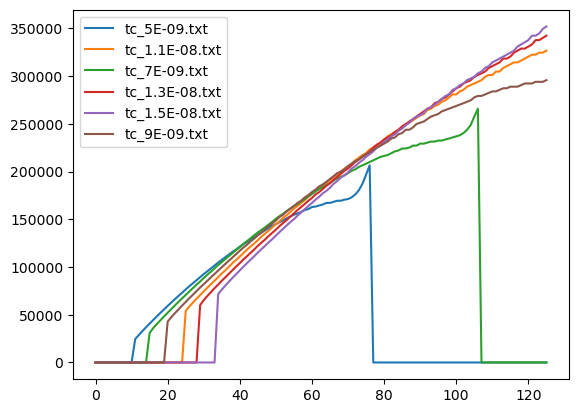

In [3]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

files = [f for f in pathlib.Path().glob("tc_*.txt")]

fig, ax = plt.subplots(1)


for file in files:
    f = file.open()
    data = pd.read_csv(file.open(), header = None)
    emp=[]
    for a in range(1,len(data)):
        tmp=[a for a in data.iloc[a][0].split(' ') if a != '']
        emp.append(tmp)
    emp=pd.DataFrame(emp)
    #poniendo todo en columnas
    x=[]
    y=[]
    for a in range(len(emp.columns)):
        if a % 2 == 0:
            # Even column index, add data points to x
            x.append(emp.iloc[:, a].values.astype(float))
        else:
            # Odd column index, add data points to y
            y.append(emp.iloc[:, a].values.astype(float))

    #obteniendo un arreglo con los spikes por cada simulacion
    spikes=[]
    for a in y:
        result = [True if a >= 1.65 else False for a in a]
        #plt.plot(result)
        index=[]
        for b in range(len(result)-1):
            if result[b] == 1 and result[b+1] == 0:
                index.append(True)
            else:
                index.append(False)
        spikes.append(index)

    #obteniendo el tiempo entre spikes y metiendolo en un arreglo
    vals=[]
    for a in range(len(y)):
        mask=spikes[a]
        vari=x[a][:-1][mask]
        #print('Time between spikes for the {}th simulation is {}'.format(a+1,vari))
        if len(vari)>=2:
            tm_diff=vari[-1]-vari[-2]
            vals.append(1/tm_diff)
            #print(f"Spike frequency of the impulses is {1/tm_diff}")
        else:
            #print('No spikes detected')
            vals.append(0)
    
    ax.plot(vals, label=file)

ax.legend()
